<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Regresi%C3%B3n_Dinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regresión Dinamica**



In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf

stock = 'META'
ticker = yf.Ticker(stock)
df = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

df


,Close
Date,
2013-01-01 00:00:00-05:00,30.887003
2013-02-01 00:00:00-05:00,27.168201
2013-03-01 00:00:00-05:00,25.503214
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276907
...,...
2023-08-01 00:00:00-04:00,295.001801
2023-09-01 00:00:00-04:00,299.308807
2023-10-01 00:00:00-04:00,300.365631


In [21]:
df.index = df.index.strftime('%Y-%m-%d')
df.index = pd.to_datetime(df.index)

df


,Close
Date,
2013-01-01,30.887003
2013-02-01,27.168201
2013-03-01,25.503214
2013-04-01,27.686640
2013-05-01,24.276907
...,...
2023-08-01,295.001801
2023-09-01,299.308807
2023-10-01,300.365631


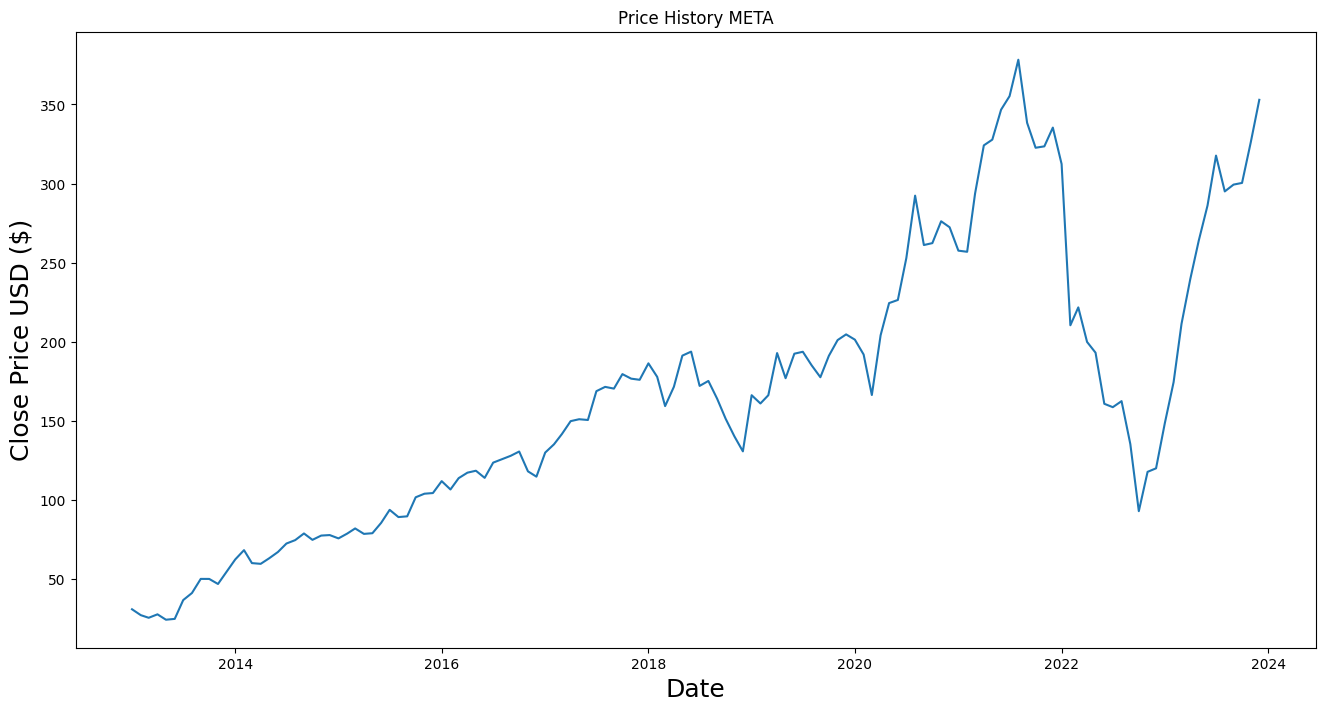

In [22]:
plt.figure(figsize=(16,8))
plt.title('Price History META')
plt.plot(df)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [23]:
df = df.reset_index()  # Reset the index to make 'Date' a regular column
df["ds"] = pd.to_datetime(df["Date"])  # Convert the 'Date' column to datetime and assign to 'ds'


In [24]:

print(df.dtypes)


Date     datetime64[ns]
Close           float64
ds       datetime64[ns]
dtype: object


In [27]:

df["unique_id"]="1"
# The DataFrame has 4 columns after adding 'ds' and 'unique_id' in previous steps, modify the column names accordingly
#df.columns=["ds", "y", "unique_id"] # incorrect
# assuming the first column is 'Date' based on previous cell outputs
df.columns = ['Date', 'Close', 'ds', 'unique_id'] # Assuming original columns and new ones
# or if you want to keep only specific columns:
# df = df[['ds', 'Close', 'unique_id']]  # Keep only 'ds', 'Close', and 'unique_id' columns
# df.columns = ["ds", "y", "unique_id"] # then rename them
df.head()

,Date,Close,ds,unique_id
0,2013-01-01,30.887003,2013-01-01,1
1,2013-02-01,27.168201,2013-02-01,1
2,2013-03-01,25.503214,2013-03-01,1
3,2013-04-01,27.686640,2013-04-01,1
4,2013-05-01,24.276907,2013-05-01,1


In [28]:

fecha_2008 = pd.DataFrame({'ds': pd.to_datetime(["2008-11-01"]), '2018_outlier': [1]})
fecha_2020 = pd.DataFrame({'ds': pd.to_datetime(["2020-03-01"]), '2020_outlier': [1]})


In [29]:
df.dtypes


,0
Date,datetime64[ns]
Close,float64
ds,datetime64[ns]
unique_id,object


In [30]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.5 MB/s eta 0:00:00


In [31]:
df = df.merge(fecha_2008, how='left', on = 'ds').fillna(0)


In [32]:
df = df.merge(fecha_2020, how='left', on = 'ds').fillna(0)


In [33]:
df.head()


,Date,Close,ds,unique_id,2018_outlier,2020_outlier
0,2013-01-01,30.887003,2013-01-01,1,0.0,0.0
1,2013-02-01,27.168201,2013-02-01,1,0.0,0.0
2,2013-03-01,25.503214,2013-03-01,1,0.0,0.0
3,2013-04-01,27.686640,2013-04-01,1,0.0,0.0
4,2013-05-01,24.276907,2013-05-01,1,0.0,0.0


In [51]:
df.rename(columns={'Close': 'y'}, inplace=True)

In [54]:
df = df.drop(columns=['Date'])

In [34]:
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [35]:
# Create a list with the model and its instantiation parameters
models = [AutoARIMA(season_length=12)]

In [55]:
sf = StatsForecast(df=df,
    models=models,
    freq='MS',
    n_jobs=1,
)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [56]:
sf.fit()


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [57]:
from statsforecast.arima import arima_string


In [58]:
arima_string(sf.fitted_[0,0].model_)


'Regression with ARIMA(1,1,1) errors'

In [59]:
df.tail()


,y,ds,unique_id,2018_outlier,2020_outlier
127,295.001801,2023-08-01,1,0.0,0.0
128,299.308807,2023-09-01,1,0.0,0.0
129,300.365631,2023-10-01,1,0.0,0.0
130,326.167938,2023-11-01,1,0.0,0.0
131,352.897461,2023-12-01,1,0.0,0.0


In [61]:

x_df = pd.DataFrame({"ds": [pd.to_datetime('2024-01-01'), pd.to_datetime('2024-02-01'), pd.to_datetime('2024-03-01')],
                     "2018_outlier": [0,0,0],
                     "2020_outlier": [0,0,0],
                     "unique_id": [1,1,1]})
x_df.head()

,ds,2018_outlier,2020_outlier,unique_id
0,2024-01-01,0,0,1
1,2024-02-01,0,0,1
2,2024-03-01,0,0,1


In [62]:
Y_hat_df = sf.forecast(3, X_df=x_df ,fitted=True)
values = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [63]:
df['autoSarimaX'] = values['AutoARIMA'].values
df.head()

,y,ds,unique_id,2018_outlier,2020_outlier,autoSarimaX
0,30.887003,2013-01-01,1,0.0,0.0,30.856116
1,27.168201,2013-02-01,1,0.0,0.0,30.787321
2,25.503214,2013-03-01,1,0.0,0.0,26.485373
3,27.686640,2013-04-01,1,0.0,0.0,24.829941
4,24.276907,2013-05-01,1,0.0,0.0,27.582597


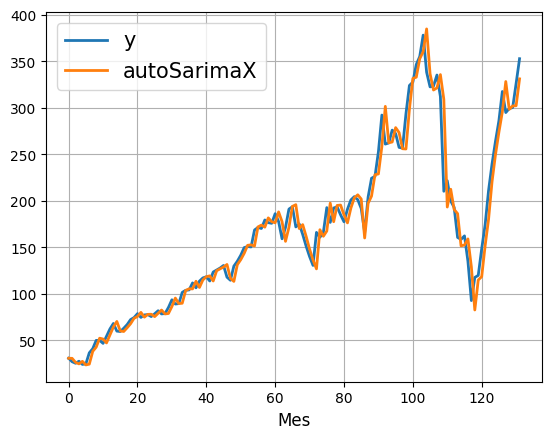

In [65]:
_, ax = plt.subplots(1, 1)
df[['y', 'autoSarimaX']].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)